In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
data = pd.read_csv('/kaggle/input/credit-card-data-set/cards_dataset.csv', engine='python')

In [22]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1,0
999998,4.258729,0.242023,0.475822,1,0,0,1,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


# Splitting

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    y = df['fraud'].copy()
    X = df.drop('fraud',axis = 1).copy()
    
    return X,y

In [ ]:
X, y = preprocess_inputs(data)

In [24]:
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.477882,-0.182849,0.043491,0.366584,1.361576,-0.334458,-1.364425
1,-0.241607,-0.188094,-0.189300,0.366584,-0.734443,-0.334458,-1.364425
2,-0.329369,-0.163733,-0.498812,0.366584,-0.734443,-0.334458,0.732909
3,-0.372854,0.021806,-0.522048,0.366584,1.361576,-0.334458,0.732909
4,0.268572,-0.172968,0.142373,0.366584,1.361576,-0.334458,0.732909
...,...,...,...,...,...,...,...
999995,-0.373473,-0.190529,-0.070505,0.366584,1.361576,-0.334458,-1.364425
999996,-0.103318,-0.091035,0.340808,0.366584,1.361576,-0.334458,-1.364425
999997,-0.362650,-0.137903,-0.573694,0.366584,1.361576,-0.334458,0.732909
999998,-0.342098,-0.185523,-0.481628,0.366584,-0.734443,-0.334458,0.732909


In [25]:
y

0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Name: fraud, Length: 1000000, dtype: int64

# Visualization

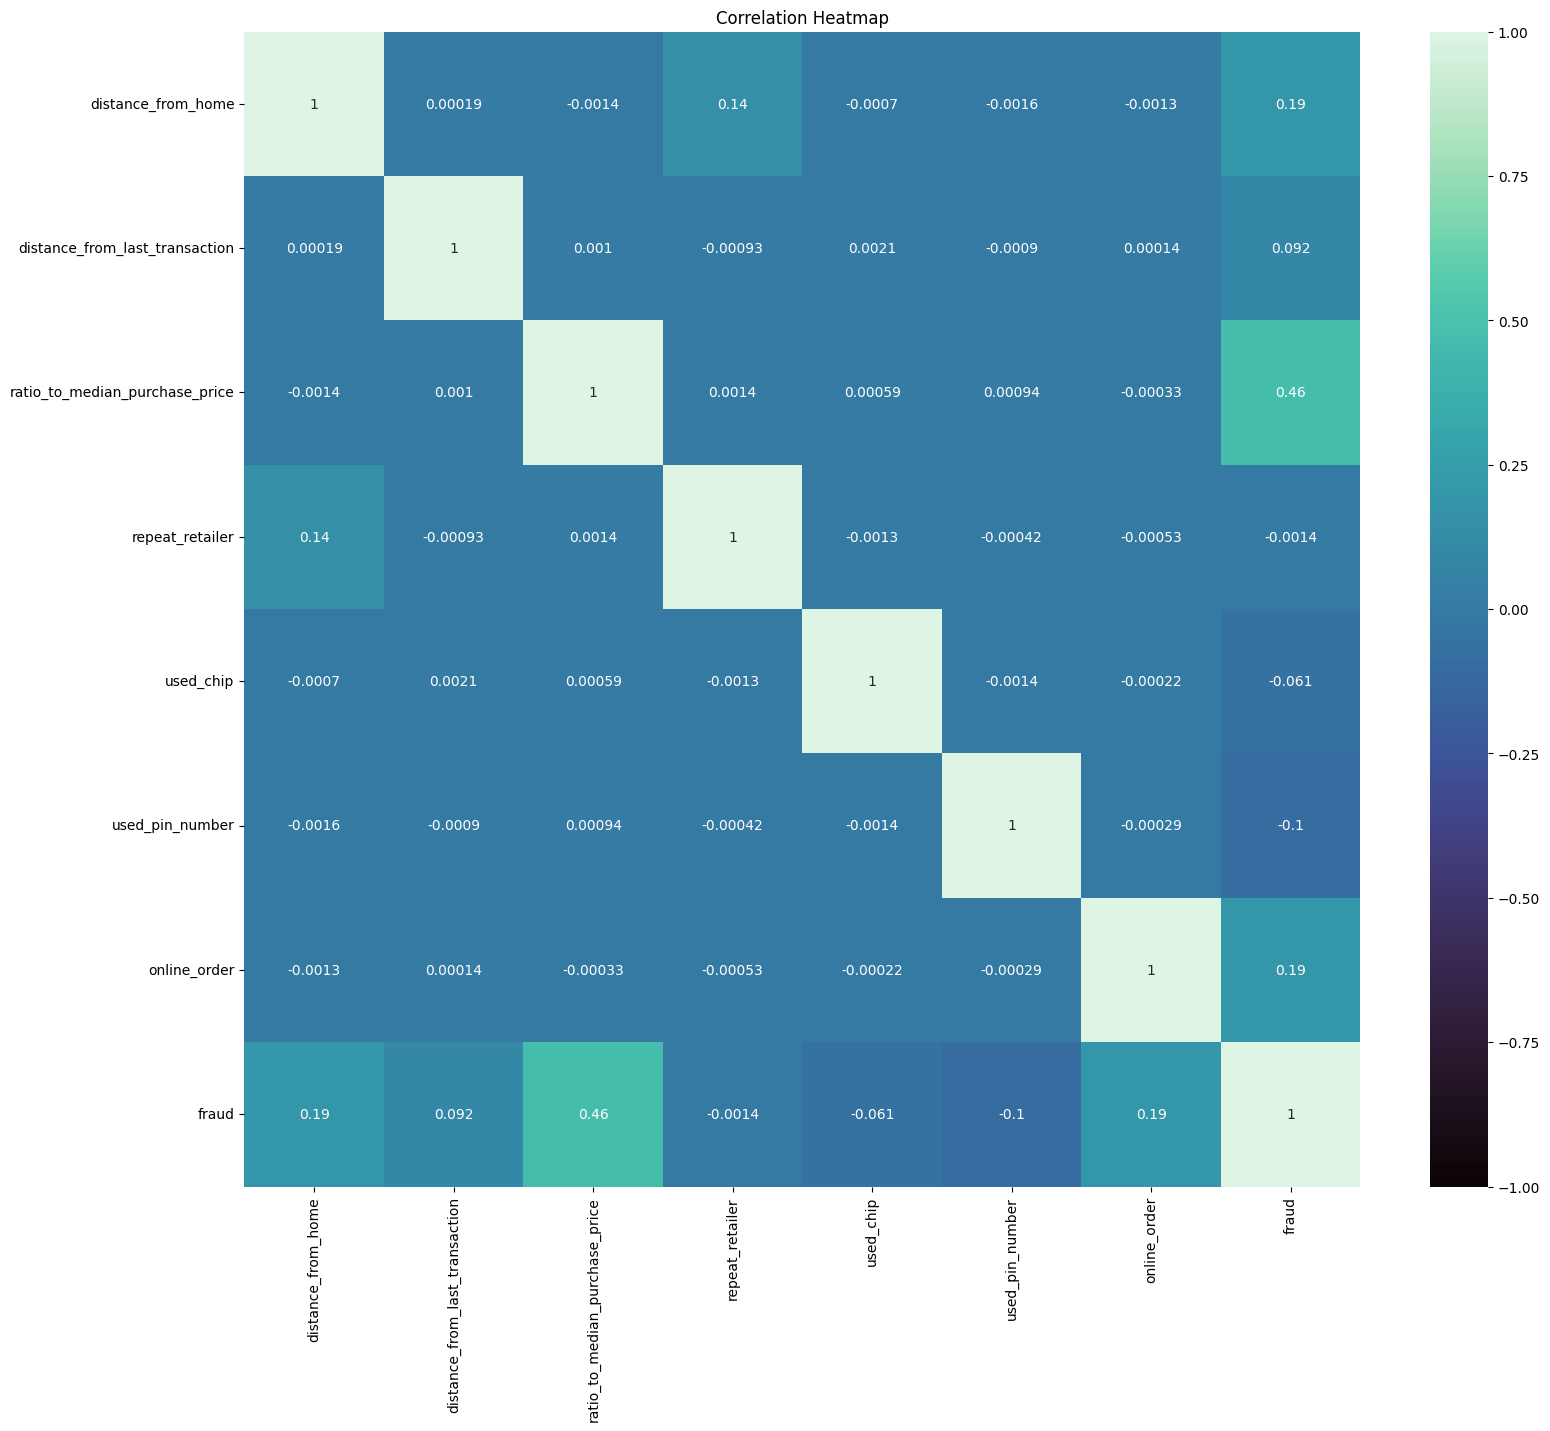

In [26]:
corr = data.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

# Preprocessing

In [27]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [28]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Split df into X and y
    y = df['fraud'].copy()
    X = df.drop('fraud', axis=1).copy()
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y

In [29]:
X, y = preprocess_inputs(data)

In [30]:
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.477882,-0.182849,0.043491,0.366584,1.361576,-0.334458,-1.364425
1,-0.241607,-0.188094,-0.189300,0.366584,-0.734443,-0.334458,-1.364425
2,-0.329369,-0.163733,-0.498812,0.366584,-0.734443,-0.334458,0.732909
3,-0.372854,0.021806,-0.522048,0.366584,1.361576,-0.334458,0.732909
4,0.268572,-0.172968,0.142373,0.366584,1.361576,-0.334458,0.732909
...,...,...,...,...,...,...,...
999995,-0.373473,-0.190529,-0.070505,0.366584,1.361576,-0.334458,-1.364425
999996,-0.103318,-0.091035,0.340808,0.366584,1.361576,-0.334458,-1.364425
999997,-0.362650,-0.137903,-0.573694,0.366584,1.361576,-0.334458,0.732909
999998,-0.342098,-0.185523,-0.481628,0.366584,-0.734443,-0.334458,0.732909


In [31]:
y

0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Name: fraud, Length: 1000000, dtype: int64

In [32]:
{column: len(X[column].unique()) for column in X.columns}

{'distance_from_home': 999971,
 'distance_from_last_transaction': 999836,
 'ratio_to_median_purchase_price': 999808,
 'repeat_retailer': 2,
 'used_chip': 2,
 'used_pin_number': 2,
 'online_order': 2}

# Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [ ]:
models = {
    LogisticRegression(): "   Logistic Regression",
    SVC():                "Support Vector Machine",
    MLPClassifier():      "        Neural Network"
  
}

for model in models.keys():
    model.fit(X_train, y_train)

In [33]:
for model, name in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

   Logistic Regression: 95.91%
Support Vector Machine: 99.77%
        Neural Network: 99.86%
